In [1]:
#!pip install keras

In [2]:
#!pip install tensorflow

In [3]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [4]:
dataset =  keras.datasets.fashion_mnist

In [5]:
((img_treino,ident_treino),(img_teste,ident_teste)) = dataset.load_data()

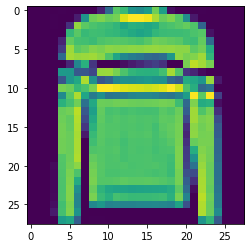

In [6]:
plt.imshow(img_treino[5])

In [7]:
nomes_classificacoes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
img_treino = img_treino/255.0


modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256,activation=tensorflow.nn.relu),
                          keras.layers.Dropout(0.2),
                          #keras.layers.Dense(128,activation = tensorflow.nn.relu),
                          #keras.layers.Dense(64,activation = tensorflow.nn.relu),
                          keras.layers.Dense(10,activation = tensorflow.nn.softmax)
                          ])

modelo.compile(optmizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

hist = modelo.fit(img_treino,ident_treino,epochs=5, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 219us/sample - loss: 0.5417 - accuracy: 0.8075 - val_loss: 0.4080 - val_accuracy: 0.8552
Epoch 2/5
48000/48000 [==============================] - 9s 183us/sample - loss: 0.4096 - accuracy: 0.8544 - val_loss: 0.4158 - val_accuracy: 0.8547
Epoch 3/5
48000/48000 [==============================] - 8s 161us/sample - loss: 0.3845 - accuracy: 0.8672 - val_loss: 0.3885 - val_accuracy: 0.8688
Epoch 4/5
48000/48000 [==============================] - 7s 152us/sample - loss: 0.3722 - accuracy: 0.8708 - val_loss: 0.3792 - val_accuracy: 0.8775
Epoch 5/5
48000/48000 [==============================] - 8s 156us/sample - loss: 0.3658 - accuracy: 0.8763 - val_loss: 0.3813 - val_accuracy: 0.8762


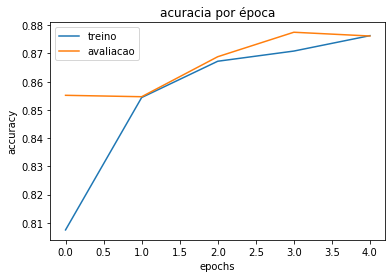

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('acuracia por época')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['treino','avaliacao'])

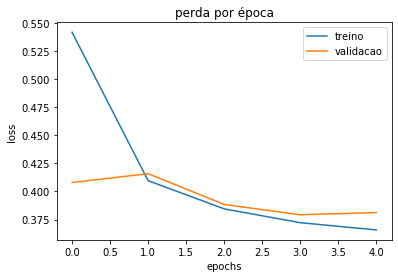

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('perda por época')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['treino','validacao'])

In [11]:
teste = modelo.predict(img_teste)

In [12]:
teste[0]
print(np.argmax(teste[3]))
print(ident_teste[3])

1
1


In [13]:
modelo.evaluate(img_teste,ident_teste)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[77.85993700637817, 0.8589]

In [19]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')